In [42]:
import SimpleITK as sitk
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [43]:
img = sitk.ReadImage('D:\\dataset_seg\\xVertSeg.v1\\Data1\\images\\image002.mhd')

In [36]:
#TIFF

sitk.WriteImage(img, "D:\\dataset_seg\\image002.tif")

In [28]:
sitk.GetArrayViewFromImage(img).shape[0]

170

In [33]:
#max pixel value of the all slices

m = 0
for i in range(sitk.GetArrayViewFromImage(img).shape[0]):
    view = sitk.GetArrayViewFromImage(img)[i, :, :]
    if max(np.unique(view)) > m:
        m = max(np.unique(view))
m 

2981

In [38]:
def convertToGrayScaleRange(image, m):
    #m = max(np.unique(image))
    #m = 3008
    new_img = np.array(image)
    new_img[:, :] = (image/m)*255
    return new_img

In [35]:
#Folder of images

for i in range(sitk.GetArrayViewFromImage(img).shape[0]):
    view = sitk.GetArrayViewFromImage(img)[i, :, :]
    grayView = convertToGrayScaleRange(view, m)
    ind = str(i+1)
    if len(ind) < 3:
        ind = "0"*(3 - len(ind)) + ind
    #cv2.imwrite("imageSlices_001/slice" + ind + ".png", grayView)
    cv2.imwrite("D:\\dataset_seg\\data\\imageSlices_004\\slice" + ind + ".png", grayView)


In [41]:
#converting to folder of .pngs (whole code)

no = sitk.GetArrayViewFromImage(img).shape[0]
shape = 0
m = 0
for j in range(no):
    view = sitk.GetArrayViewFromImage(img)[j, :, :]
    if max(np.unique(view)) > m:
        m = max(np.unique(view))   

for k in range(no):
    view = sitk.GetArrayViewFromImage(img)[k, :, :]
    grayView = convertToGrayScaleRange(view, m)
    ind = str(k+1)
    if len(ind) < 3:
        ind = "0"*(3 - len(ind)) + ind
    grayView = cv2.resize(grayView, (1024, 1024)) 
    cv2.imwrite("D:\\dataset_seg\\data\\imageSlices_004\\slice" + ind + ".png", grayView)

In [73]:
#Preparing train dataset [100 to 200] slices x 15

for i in range(1, 16):
    imgName = "image00" + str(i) if len(str(i)) == 1 else "image0" + str(i)
    print(imgName, end=" , ")
    img_i = sitk.ReadImage('D:\\dataset_seg\\xVertSeg.v1\\Data1\\images\\' + imgName + '.mhd')
    no = 0
    shape = 0
    try:
        m = 0
        for j in range(200):
            view = sitk.GetArrayViewFromImage(img_i)[j, :, :]
            if max(np.unique(view)) > m:
                m = max(np.unique(view))
            no += 1    

        for k in range(200):
            view = sitk.GetArrayViewFromImage(img_i)[k, :, :]
            grayView = convertToGrayScaleRange(view)
            ind = str(k+1)
            if len(ind) < 3:
                ind = "0"*(3 - len(ind)) + ind
            cv2.imwrite("D:\\dataset_seg\\train\\" + imgName + "_" + ind + ".png", grayView)
            shape = grayView.shape

    except Exception as e:
        print(e, end=" , ")
        for k in range(no):
            view = sitk.GetArrayViewFromImage(img_i)[k, :, :]
            grayView = convertToGrayScaleRange(view)
            ind = str(k+1)
            if len(ind) < 3:
                ind = "0"*(3 - len(ind)) + ind
            cv2.imwrite("D:\\dataset_seg\\train\\" + imgName + "_" + ind + ".png", grayView)
            shape = grayView.shape
        
    print(shape, " , ", no, "images")

image001 , (1024, 1024)  ,  200 images
image002 , (1024, 1024)  ,  200 images
image003 , (1024, 1024)  ,  200 images
image004 , index 170 is out of bounds for axis 0 with size 170 , (1024, 1024)  ,  170 images
image005 , index 181 is out of bounds for axis 0 with size 181 , (1024, 1024)  ,  181 images
image006 , index 100 is out of bounds for axis 0 with size 100 , (1024, 1024)  ,  100 images
image007 , index 180 is out of bounds for axis 0 with size 180 , (1024, 1024)  ,  180 images
image008 , (512, 512)  ,  200 images
image009 , (1024, 1024)  ,  200 images
image010 , (1024, 1024)  ,  200 images
image011 , (512, 512)  ,  200 images
image012 , index 130 is out of bounds for axis 0 with size 130 , (1024, 1024)  ,  130 images
image013 , index 110 is out of bounds for axis 0 with size 110 , (1024, 1024)  ,  110 images
image014 , (1024, 1024)  ,  200 images
image015 , index 190 is out of bounds for axis 0 with size 190 , (1024, 1024)  ,  190 images


In [87]:
for i in range(1, 16):
    imgName = "image00" + str(i) if len(str(i)) == 1 else "image0" + str(i)
    print(imgName, end=" , ")
    img_i = sitk.ReadImage('D:\\dataset_seg\\xVertSeg.v1\\Data1\\images\\' + imgName + '.mhd')
    no = sitk.GetArrayViewFromImage(img_i).shape[0]
    shape = 0
    m = 0
    for j in range(no):
        view = sitk.GetArrayViewFromImage(img_i)[j, :, :]
        if max(np.unique(view)) > m:
            m = max(np.unique(view))   

    for k in range(no):
        view = sitk.GetArrayViewFromImage(img_i)[k, :, :]
        grayView = convertToGrayScaleRange(view, m)
        ind = str(k+1)
        if len(ind) < 3:
            ind = "0"*(3 - len(ind)) + ind
        grayView = cv2.resize(grayView, (1024, 1024)) 
        cv2.imwrite("D:\\dataset_seg\\train\\" + imgName + "_" + ind + ".png", grayView)
        shape = grayView.shape
        
    print(shape, " , ", no, "images")

image001 , (1024, 1024)  ,  200 images
image002 , (1024, 1024)  ,  250 images
image003 , (1024, 1024)  ,  340 images
image004 , (1024, 1024)  ,  170 images
image005 , (1024, 1024)  ,  181 images
image006 , (1024, 1024)  ,  100 images
image007 , (1024, 1024)  ,  180 images
image008 , (1024, 1024)  ,  218 images
image009 , (1024, 1024)  ,  230 images
image010 , (1024, 1024)  ,  200 images
image011 , (1024, 1024)  ,  351 images
image012 , (1024, 1024)  ,  130 images
image013 , (1024, 1024)  ,  110 images
image014 , (1024, 1024)  ,  223 images
image015 , (1024, 1024)  ,  190 images


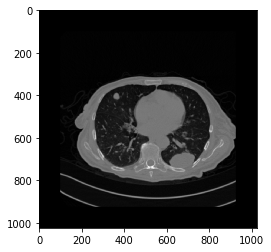

In [46]:
#image

view = sitk.GetArrayViewFromImage(img)[0, :, :]
plt.imshow(view, cmap="gray")
#view

(1024, 1280)


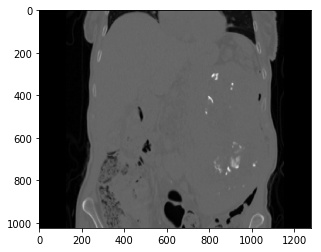

In [77]:
#Diff view

view = sitk.GetArrayViewFromImage(img)[:, 500, :]
view = cv2.resize(view, (1280,1024))
print(view.shape)
plt.imshow(view, cmap="gray")
#view

In [24]:
#hdf5 to tiff

import h5py
#hdf = h5py.File('D:\dataset_seg\exports\im2_comp.h5', 'r')
hdf = h5py.File('D:\\dataset_seg\\test\\results.h5', 'r')
#hdf.keys
data = hdf['exported_data']
data

<HDF5 dataset "exported_data": shape (200, 1024, 1024, 2), type "|u1">

In [44]:
np.unique(data[i])
data.shape

(200, 1024, 1024, 2)

In [7]:
#Convert prob map to B&W
def conv(x):    
    a = x[:, :, 0]
    b = x[:, :, 1]
    a[a > 0.5] = True
    a[a <= 0.5] = False
    return a
#plt.imshow(a, cmap="gray")

In [8]:
#Convert all slices
newData = []
for i in range(data.shape[0]):
    newData.append(conv(data[i]))

In [9]:
newData = np.array(newData)
newData.shape

(200, 1024, 1024)

In [11]:
newImg = sitk.GetImageFromArray(newData)
newImg

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x00000242DBA2F1B0> >

In [13]:
#sitk.WriteImage(newImg, "D:\\dataset_seg\\output\\out.tif")
sitk.WriteImage(newImg, "D:\\dataset_seg\\test\\results.tif")

In [12]:
#sitk.WriteImage(newImg, "D:\\dataset_seg\\output\\out.mhd")
sitk.WriteImage(newImg, "D:\\dataset_seg\\test\\results.mhd")

In [110]:
from medpy.io.load import load
from medpy.io.save import save
mhdImg, header = load("D:\\dataset_seg\\dicom\\image001.mhd")
mhdImg.dtype
header.spacing
save(img, "D:\\dataset_seg\\dicom\\image001.dcm")

AttributeError: 'Image' object has no attribute 'ndim'

In [57]:
hdf1 = h5py.File('D:\dataset_seg\exports\im2_comp_uint8.h5', 'r')
d = hdf1['exported_data']

In [114]:
img

'MetaImageIO'